In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#import seaborn as sbs

DATA **collection

In [63]:
BBK_2016 = pd.read_csv('BKK-2016.csv')
BBK_2017 = pd.read_csv('BKK-2017.csv')
BBK_2018 = pd.read_csv('BKK-2018.csv')
BBK_2019 = pd.read_csv('BKK-2019.csv')
BBK_2020 = pd.read_csv('BKK-2020.csv')
BBK_2021 = pd.read_csv('BKK-2021.csv')
BBK_2022 = pd.read_csv('BKK-2022.csv')
BBK_2023 = pd.read_csv('BKK-2023.csv')


In [64]:
merged_df = pd.concat([BBK_2016, BBK_2017, BBK_2018, BBK_2019, BBK_2020, BBK_2021, BBK_2022, BBK_2023], ignore_index=True)
print(merged_df)

           date   pm25
0     30/7/2016     61
1     31/7/2016     68
2      1/8/2016     60
3      2/8/2016     68
4      3/8/2016     70
...         ...    ...
2554   6/8/2023     57
2555   7/8/2023     57
2556   8/8/2023     56
2557   9/8/2023     63
2558  10/8/2023     68

[2559 rows x 2 columns]


In [65]:
merged_df

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [66]:
merged_df.to_csv("BKK_PM_All.csv", index=False)

Data cleaning and Data Preprocessing 

In [16]:
df_train = pd.read_csv('BKK_PM_All.csv')
df_train 

,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [17]:
#Check missing value
print('Number of missing valuen : ',df_train[' pm25'].isnull().sum())
# Drop last Date is null 
df_train.dropna(subset=['date'], inplace=True)   
df_train

Number of missing valuen :  0


,date,pm25
0,30/7/2016,61
1,31/7/2016,68
2,1/8/2016,60
3,2/8/2016,68
4,3/8/2016,70
...,...,...
2554,6/8/2023,57
2555,7/8/2023,57
2556,8/8/2023,56
2557,9/8/2023,63


In [18]:
#df_train = df_train[~df_train.apply(lambda row: any(val.strip() == '' for val in row), axis=1)]
#df_train

In [19]:
df_train[' pm25']=df_train[' pm25'].shift(-15).rolling(30,min_periods=1).mean()
df_train

,date,pm25
0,30/7/2016,68.000000
1,31/7/2016,68.000000
2,1/8/2016,68.000000
3,2/8/2016,69.750000
4,3/8/2016,72.800000
...,...,...
2554,6/8/2023,59.578947
2555,7/8/2023,60.055556
2556,8/8/2023,60.294118
2557,9/8/2023,60.625000


In [21]:
df_train2 =df_train.copy()

In [22]:
df_train2

,date,pm25
0,30/7/2016,68.000000
1,31/7/2016,68.000000
2,1/8/2016,68.000000
3,2/8/2016,69.750000
4,3/8/2016,72.800000
...,...,...
2554,6/8/2023,59.578947
2555,7/8/2023,60.055556
2556,8/8/2023,60.294118
2557,9/8/2023,60.625000


<Axes: >

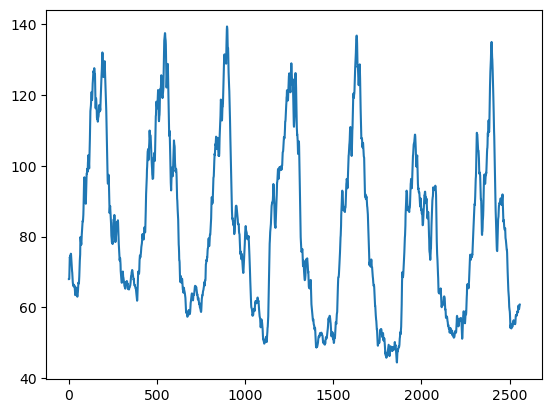

In [23]:
fig, ax = plt.subplots()

df_train[' pm25'].rolling(1).mean().plot()

In [24]:
def create_fea(df):
    df['PM2.5_ma20'] = df_train[' pm25'].shift(-7).rolling(14,min_periods=1).mean()
    date_time = pd.to_datetime(df['date'],format='%d/%m/%Y')
    
    df['day']=date_time.dt.strftime("%d").astype('int')
    df['month']=date_time.dt.strftime("%m").astype('int')
    df['year']=date_time.dt.strftime("%Y").astype('int')
    
    df['y_day']=getattr(date_time.dt, 'dayofyear')
    df['y_quarter']=getattr(date_time.dt, 'quarter')
    #df['y_week']=getattr(date_time.dt, 'weekofyear')
    
    lags = [7,30,365]
    lag_cols = [f"lag_{lag}" for lag in lags]
    for lag, lag_col in (zip(lags, lag_cols)):
        df[lag_col] = df[" pm25"].shift(lag)
        
    wins = [5,30]
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rmean_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).mean())
    
    for win in (wins) :
        for lag,lag_col in (zip(lags, lag_cols)):
            df[f"Rstd_{lag}_{win}"] = df[lag_col].transform(lambda x : x.rolling(win).std())

In [25]:
create_fea(df_train)
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,30/7/2016,68.000000,74.625000,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.000000,74.479167,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.000000,74.419444,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.750000,74.473674,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.800000,74.612273,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2555,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2556,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2557,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


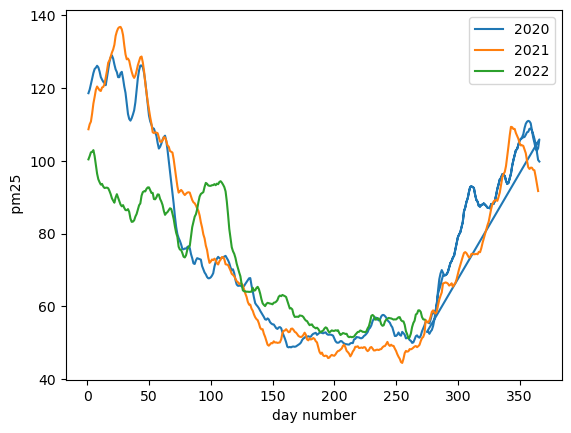

In [26]:
fig, ax = plt.subplots()
#ax.plot(df_train.loc[df_train['year']==2016]['y_day'],df_train.loc[df_train['year']==2016][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2018]['y_day'],df_train.loc[df_train['year']==2018][' pm25'].rolling(1).mean())
#ax.plot(df_train.loc[df_train['year']==2019]['y_day'],df_train.loc[df_train['year']==2019][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2020]['y_day'],df_train.loc[df_train['year']==2020][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2021]['y_day'],df_train.loc[df_train['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_train.loc[df_train['year']==2022]['y_day'],df_train.loc[df_train['year']==2022][' pm25'].rolling(1).mean())


ax.set_xlabel('day number')
ax.set_ylabel(' pm25')
plt.legend(['2020', '2021', '2022'])

In [27]:
df_train.dropna(inplace = True)
df_train.reset_index(drop=True,inplace=True)
df_train.shape

(2165, 23)

In [28]:
df_train

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_365_5,Rmean_7_30,Rmean_30_30,Rmean_365_30,Rstd_7_5,Rstd_30_5,Rstd_365_5,Rstd_7_30,Rstd_30_30,Rstd_365_30
0,29/8/2017,70.133333,68.750000,29,8,2017,241,3,61.900000,68.800000,...,66.257767,66.631111,67.482222,70.457025,0.759386,0.634910,0.188225,2.462748,2.019441,3.372741
1,30/8/2017,70.200000,69.595238,30,8,2017,242,3,62.200000,68.466667,...,66.270075,66.356667,67.578889,70.393692,0.584808,0.634910,0.171575,2.483095,1.993831,3.437684
2,31/8/2017,69.600000,70.373810,31,8,2017,243,3,63.766667,68.333333,...,66.126371,66.130000,67.684444,70.320359,0.733485,0.580038,0.208413,2.394316,1.944946,3.513144
3,1/9/2017,69.666667,71.009524,1,9,2017,244,3,65.433333,67.833333,...,66.074943,65.963333,67.764444,70.257025,1.472338,0.534582,0.164286,2.254367,1.897951,3.573033
4,2/9/2017,69.533333,71.497619,2,9,2017,245,3,67.266667,68.000000,...,65.953333,65.872222,67.851111,70.119803,2.256423,0.382681,0.224351,2.137820,1.844880,3.670887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,6/8/2023,59.578947,60.009632,6,8,2023,218,3,58.807692,56.066667,...,51.926667,56.786423,56.531111,52.762222,0.127115,0.409607,0.458500,1.356359,2.699169,0.765328
2161,7/8/2023,60.055556,60.146595,7,8,2023,219,3,58.640000,55.433333,...,52.213333,56.886645,56.257778,52.764444,0.149996,0.356215,0.582428,1.379110,2.347428,0.765838
2162,8/8/2023,60.294118,60.199920,8,8,2023,220,3,59.666667,55.333333,...,52.493333,57.035534,56.008889,52.758889,0.397741,0.465713,0.549444,1.430879,1.999980,0.763421
2163,9/8/2023,60.625000,60.181432,9,8,2023,221,3,60.347826,55.433333,...,52.826667,57.203795,55.810000,52.760000,0.703474,0.473169,0.443095,1.514128,1.722850,0.764309


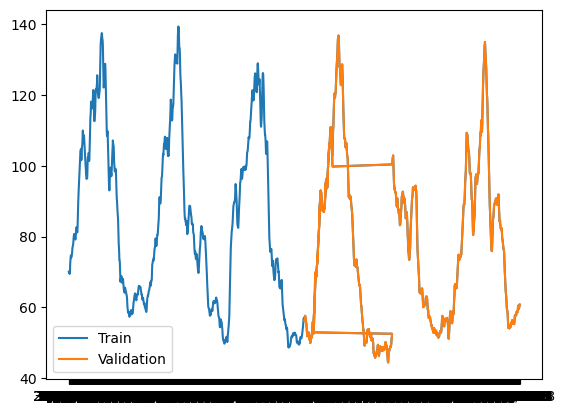

In [29]:
ratio = 0.5
split = int(len(df_train) * ratio)

#Step Lable 
dates_train,X_train, y_train =  df_train.iloc[:,0], df_train.iloc[:,2:], df_train.iloc[:,1]
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation'])

In [2]:
def get_params(multivar=False):
    lr = 3e-4
    n_steps=24*30
    n_horizon=24
    if multivar:
        n_features=5
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [30]:
# N = X_train.shape[1]
N = 100

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ModelCheckpoint


import tensorflow as tf

model = Sequential([
                    # Add the Input layer
                    layers.Input((X_train.shape[1], 1)),
                    # Add the first LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a second LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    
                    # Add a third LSTM layer
                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),

                    layers.LSTM(N,return_sequences=True),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                     # Add a forth LSTM layer
                    layers.LSTM(N,return_sequences=False),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
    
                    # Add a Dense
                    layers.Dense(64, activation='sigmoid'),
                    layers.Dropout(0.2),

                    layers.Dense(32, activation='sigmoid'),
                    layers.Dropout(0.2),    
                   
                    # Add the output layer
                    layers.Dense(1)])


model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 21, 100)           0         
                                                                 
 batch_normalization (Batch  (None, 21, 100)           400       
 Normalization)                                                  
                                                                 
 lstm_3 (LSTM)               (None, 21, 100)           80400     
                                                                 
 dropout_3 (Dropout)         (None, 21, 100)           0         
                                                                 
 batch_normalization_1 (Bat  (None, 21, 100)           400       
 chNormalization)                                       

In [31]:
def lr_schedule(epoch, lr):
    if epoch < 100:
        return lr 
    else: 
        return lr 
#         return lr * tf.math.exp(-0.1)


# Compile the model
initial_learning_rate = 3e-4
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mse',metrics=['mean_absolute_error'])

# Define the learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_schedule)


early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

In [32]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[mc, lr_schedule,early_stopping],validation_data=(X_test, y_test))  #,validation_data=(X_test, y_test)

Epoch 1/200


2023-08-15 20:44:00.486871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:00.914228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.716019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.850612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:01.909416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:02.034939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:03.108218: I tensorflow/core/grappler/optimizers/cust

 1/68 [..............................] - ETA: 6:16 - loss: 8483.5801 - mean_absolute_error: 87.7422

2023-08-15 20:44:04.024570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 6819.5581 - mean_absolute_error: 79.0626

2023-08-15 20:44:08.371338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.514510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.579261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.629008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.671938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:44:08.713732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 11s 76ms/step - loss: 6819.5581 - mean_absolute_error: 79.0626 - val_loss: 6121.2339 - val_mean_absolute_error: 74.8574 - lr: 3.0000e-04
Epoch 2/200


/Users/kuer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/68 [==============================] - 3s 37ms/step - loss: 6563.5171 - mean_absolute_error: 77.4253 - val_loss: 5924.8501 - val_mean_absolute_error: 73.5381 - lr: 3.0000e-04
Epoch 3/200
68/68 [==============================] - 3s 38ms/step - loss: 6371.4536 - mean_absolute_error: 76.1578 - val_loss: 5756.6943 - val_mean_absolute_error: 72.3976 - lr: 3.0000e-04
Epoch 4/200
68/68 [==============================] - 2s 36ms/step - loss: 6221.5044 - mean_absolute_error: 75.1716 - val_loss: 5597.6230 - val_mean_absolute_error: 71.3067 - lr: 3.0000e-04
Epoch 5/200
68/68 [==============================] - 3s 37ms/step - loss: 6100.7876 - mean_absolute_error: 74.3657 - val_loss: 5470.2217 - val_mean_absolute_error: 70.4133 - lr: 3.0000e-04
Epoch 6/200
68/68 [==============================] - 2s 35ms/step - loss: 5999.0215 - mean_absolute_error: 73.6829 - val_loss: 5359.1680 - val_mean_absolute_error: 69.6129 - lr: 3.0000e-04
Epoch 7/200
68/68 [==============================] - 2s 35ms/step -

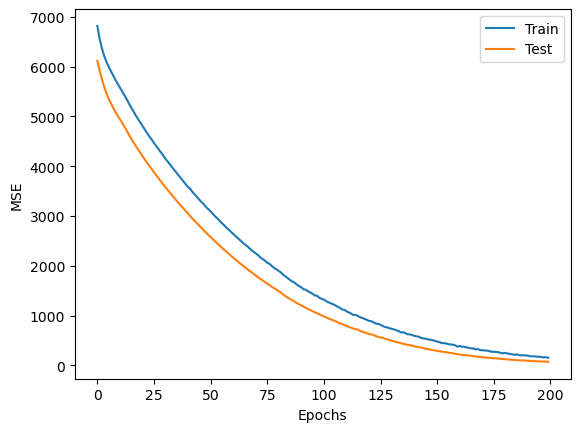

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train','Test']);

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

2023-08-15 20:58:41.693859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:41.885798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.047762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.126726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.173268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-15 20:58:42.230682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 2s 12ms/step


3.7510789316815116

In [35]:
mae = np.sqrt(mean_squared_error(preds, y_test))
print("Root Mean Squared Error (RMSE):", mae)

Root Mean Squared Error (RMSE): 8.347409809607445


In [90]:
date_df.to_csv("data_2024.csv", index=False)

In [ ]:
model.load_weights('/kaggle/working/best_model.h5')

68/68 [==============================] - 1s 9ms/step


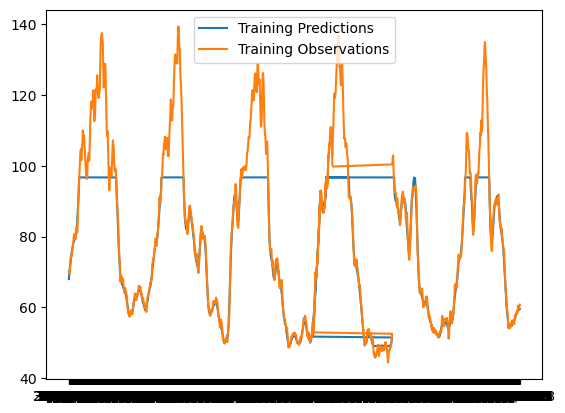

In [36]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

34/34 [==============================] - 0s 9ms/step


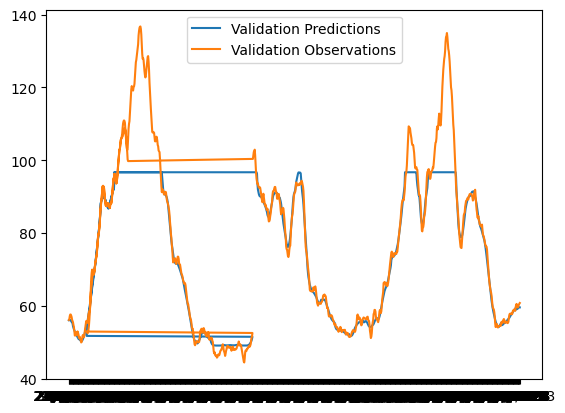

In [37]:
dates_test,X_test, y_test =  df_train.iloc[split:,0], df_train.iloc[split:,2:], df_train.iloc[split:,1]

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [39]:
df_date = pd.read_csv("data_2024.csv")
df_date.loc[:, 'PM2.5'] = "0"

In [131]:
# Generate a date range from August 11, 2023, to December 31, 2024
start_date = '8-11-2023'
end_date = '31-12-2024'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame({'date': date_range})

# Format dates in 'dd/mm/yyyy' format
date_df['date'] = date_df['date'].dt.strftime('%d/%m/%Y')
# Display the DataFrame
date_df


/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/307433723.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_range = pd.date_range(start=start_date, end=end_date, freq='D')


,date
0,11/08/2023
1,12/08/2023
2,13/08/2023
3,14/08/2023
4,15/08/2023
...,...
504,27/12/2024
505,28/12/2024
506,29/12/2024
507,30/12/2024


In [132]:
date_df.to_csv('date_range_2024_new.csv', index=False)

In [133]:
df_date = pd.read_csv("date_range_2024_new.csv")
df_date.loc[:, ' pm25'] = ""
df_date

,date,pm25
0,11/08/2023,
1,12/08/2023,
2,13/08/2023,
3,14/08/2023,
4,15/08/2023,
...,...,...
504,27/12/2024,
505,28/12/2024,
506,29/12/2024,
507,30/12/2024,


In [134]:
df_all = df_train2.copy()
df_all = pd.concat([df_all,df_date])
df_all.reset_index(drop=True,inplace=True)
df_all


,date,pm25
0,30/7/2016,68.0
1,31/7/2016,68.0
2,1/8/2016,68.0
3,2/8/2016,69.75
4,3/8/2016,72.8
...,...,...
3063,27/12/2024,
3064,28/12/2024,
3065,29/12/2024,
3066,30/12/2024,


In [135]:
def create_fea(df):
    df['PM2.5_ma20'] = df_train[' pm25'].shift(-7).rolling(14, min_periods=1).mean()
    date_time = pd.to_datetime(df['date'], format='%d/%m/%Y')
    
    df['day'] = date_time.dt.strftime("%d").astype('int')
    df['month'] = date_time.dt.strftime("%m").astype('int')
    df['year'] = date_time.dt.strftime("%Y").astype('int')
    
    df['y_day'] = getattr(date_time.dt, 'dayofyear')
    df['y_quarter'] = getattr(date_time.dt, 'quarter')
    
    lags = [7, 30, 365]
    lag_cols = [f"lag_{lag}" for lag in lags]
    for lag, lag_col in zip(lags, lag_cols):
        df[lag_col] = df[" pm25"].shift(lag)
        
    wins = [5, 30]
    for win in wins:
        for lag, lag_col in zip(lags, lag_cols):
            # Convert column to numeric and handle missing values
            df[lag_col] = pd.to_numeric(df[lag_col], errors='coerce')
            df[f"Rmean_{lag}_{win}"] = df[lag_col].rolling(win).mean()
            df[f"Rstd_{lag}_{win}"] = df[lag_col].rolling(win).std()

# Call the function with your DataFrame
create_fea(df_all)


In [136]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,27/12/2024,,NaN,27,12,2024,362,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3064,28/12/2024,,NaN,28,12,2024,363,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3065,29/12/2024,,NaN,29,12,2024,364,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3066,30/12/2024,,NaN,30,12,2024,365,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
from tqdm.notebook import tqdm,trange
create_fea(df_all)

magic_num = [1]
all_result = []

for number in tqdm(magic_num):
    result_pre = []
    
    for day in trange(509):
        input_data = df_all.iloc[2559+day:2559+day+1, 2:]
        input_data = input_data.fillna(0)  # Fill NaN values with zeros
        print("Input Data:", input_data)  # Print input data for debugging
        
        result = model.predict(input_data).item()
        print("Prediction:", result)  # Print prediction for debugging
        
        df_all[' pm25'][2559+day] = result * number
        result_pre.append(result)
    
    all_result.append(result_pre)

ave_result = np.mean(np.stack(all_result), axis=0)



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2559         0.0   11      8  2023    223          3  59.952381  55.566667   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2559     53.0  59.830466  ...   55.493333   0.142205    53.113333    0.177326   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2559   57.484834   1.661708        55.53    1.328738     52.696667   

      Rstd_365_30  
2559     0.685613  

[1 rows x 21 columns]
1/1 [==============================] - 0s 385ms/step
Prediction: 49.55179214477539
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter  lag_7     lag_30  \
2560         0.0   12      8  2023    224          3   59.6  55.566667   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2560     53.0  60.022466  ...       55.52   0.140633        53.12    0.170945   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rme

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 80ms/step
Prediction: 49.460540771484375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2563         0.0   15      8  2023    227          3  60.294118  55.666667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2563  53.966667    59.8962  ...   55.486667   0.164317         53.2   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2563    0.441588    58.02801   1.687274    55.141111    0.627082   

      Rmean_365_30  Rstd_365_30  
2563     52.687778     0.675487  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.45446014404297
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter   lag_7     lag_30  \
2564         0.0   16      8  2023    228          3  60.625  56.766667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2564  54.533333  60.030724  ...   55.726667   0.602495    53.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 21ms/step
Prediction: 49.381832122802734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2567         0.0   19      8  2023    231          3  49.474388  57.833333   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2567  57.633333  53.889993  ...       57.12   0.921834    55.866667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2567    1.648063   57.590982   3.090387    55.506667    0.995715   

      Rmean_365_30  Rstd_365_30  
2567     53.087778      1.51378  

[1 rows x 21 columns]
1/1 [==============================] - 0s 32ms/step
Prediction: 49.40330123901367
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2568         0.0   20      8  2023    232          3  49.460541  57.866667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2568  57.333333  51.723277  ...       57.56   0.468093 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.50774002075195
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2572         0.0   24      8  2023    236          3  49.43227  58.066667   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2572  56.566667  49.455036  ...        57.9   0.141421    56.686667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2572    0.403182   56.481266   4.379609    56.092222     1.18505   

      Rmean_365_30  Rstd_365_30  
2572     53.736667     2.012649  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.55889129638672
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2573         0.0   25      8  2023    237          3  49.433727  58.733333   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2573     56.2  49.449673  ...   58.073333   0.39

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 50.17307662963867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2578         0.0   30      8  2023    242          3  49.452274   58.64   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2578  56.333333  49.451209  ...   58.813202   0.149996        55.34   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2578    0.715852   54.800925    5.10926    56.886645     1.37911   

      Rmean_365_30  Rstd_365_30  
2578     54.385556     1.958627  

[1 rows x 21 columns]
1/1 [==============================] - 0s 38ms/step
Prediction: 50.394588470458984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2579         0.0   31      8  2023    243          3  49.444759  59.666667   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2579     56.6  49.451688  ...   59.001708   0.39774

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 83ms/step
Prediction: 62.59865188598633
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2581         0.0    2      9  2023    245          3  49.436714  60.545455   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2581  56.733333  49.445934  ...   59.601528   0.867023    56.466667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2581    0.400694   53.894236   5.176306    57.357532    1.611687   

      Rmean_365_30  Rstd_365_30  
2581     54.897778     1.824166  

[1 rows x 21 columns]
1/1 [==============================] - 0s 21ms/step
Prediction: 57.64304733276367
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2582         0.0    3      9  2023    246          3  49.431938  59.952381   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2582     56.7  49.441532  ...   59.830466   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 50.321197509765625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2586         0.0    7      9  2023    250          3  52.056393  60.294118   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2586     56.4  49.947327  ...     59.8962   0.306297    56.486667    0.134578   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2586   52.385172    4.77457     58.02801    1.687274     55.563333   

      Rstd_365_30  
2586     1.506216  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 50.029056549072266
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7  lag_30  \
2587         0.0    8      9  2023    251          3  49.753521  60.625   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2587     56.7  50.011644  ...   60.030724   0.450772  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 26ms/step
Prediction: 49.36772537231445
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2591         0.0   12      9  2023    255          3  49.395435  49.460541   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2591  55.933333  49.471461  ...   51.723277   4.976337        56.58   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2591    0.483391   50.629595   3.322469    57.397445    3.406597   

      Rmean_365_30  Rstd_365_30  
2591     56.144444     1.035512  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.300662994384766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2592         0.0   13      9  2023    256          3  49.402355  49.45446   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2592  55.866667  49.401228  ...   49.489169   0.040014   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.23749923706055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2597         0.0   18      9  2023    261          3  50.669567  49.442364   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2597  51.566667  50.154856  ...   49.447254    0.01641    52.633333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2597    1.496106   49.651966   0.588538     55.92158    4.706593   

      Rmean_365_30  Rstd_365_30  
2597     55.695556      1.61463  

[1 rows x 21 columns]
1/1 [==============================] - 0s 74ms/step
Prediction: 49.236602783203125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2598         0.0   19      9  2023    262          3  50.680187  49.452911   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2598  52.533333  50.410224  ...   49.446371   0.015842 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.240413665771484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2601         0.0   22      9  2023    265          3  50.747826  49.452274   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2601  56.066667  50.704562  ...   49.451209   0.005023    53.986667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2601    1.904468   49.818977    0.68406    54.800925     5.10926   

      Rmean_365_30  Rstd_365_30  
2601     55.412222      1.66562  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.24631881713867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2602         0.0   23      9  2023    266          3  50.77747  49.444759   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2602  57.766667  50.726143  ...   49.451688   0.003973   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 23ms/step
Prediction: 49.35025405883789
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2606         0.0   27      9  2023    270          3  50.776203  49.426807   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2606  58.466667  50.791859  ...   49.436439   0.007297    58.406667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2606    0.516075    50.04376   0.744665    53.259721    5.098151   

      Rmean_365_30  Rstd_365_30  
2606     55.903333     2.000983  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.39585876464844
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2607         0.0   28      9  2023    271          3  50.769169  49.41927   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2607  57.066667  50.790199  ...   49.431341   0.008783    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 56.23114013671875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2612         0.0    3     10  2023    276          4  50.788811  49.395435   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2612  55.533333  50.760915  ...   50.005713   1.156225        56.08   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2612    0.393418   50.307498   0.717559    51.309315    3.999003   

      Rmean_365_30  Rstd_365_30  
2612     55.851111     1.993932  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 52.54251480102539
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2613         0.0    4     10  2023    277          4  50.809772  49.391926   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2613  56.133333  50.772846  ...   50.003652   1.157578  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.81655502319336
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2615         0.0    6     10  2023    279          4  50.839745  49.402355   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2615     58.5  50.803996  ...   49.401228   0.011676    56.633333    1.220656   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2615   50.448254   0.663146    50.274489    2.810077     55.934444   

      Rstd_365_30  
2615     2.058912  

[1 rows x 21 columns]
1/1 [==============================] - 0s 31ms/step
Prediction: 49.51435470581055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2616         0.0    7     10  2023    280          4  52.598133  49.403347   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2616     58.9  51.171586  ...     49.3977   0.0049

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 29ms/step
Prediction: 49.333473205566406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2618         0.0    9     10  2023    282          4  50.986397  50.63969   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2618  58.033333  51.337354  ...   49.648992   0.553828    58.186667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2618    0.635785   50.574742   0.695956    49.573697    0.520865   

      Rmean_365_30  Rstd_365_30  
2618     56.105556     2.188635  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.29584884643555
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2619         0.0   10     10  2023    283          4  50.780598  50.657543   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2619  58.566667  51.329179  ...   49.901414   0.682129   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.26494598388672
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2624         0.0   15     10  2023    288          4  50.583313  50.747826   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2624     66.3  50.591335  ...   50.704562   0.032335        63.04    2.239345   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2624   50.819563   0.371443    49.818977     0.68406     57.458889   

      Rstd_365_30  
2624     3.421743  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.27389144897461
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2625         0.0   16     10  2023    289          4  50.594036  50.77747   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2625     66.4  50.577798  ...   50.726143    0.03855

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.321067810058594
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2630         0.0   21     10  2023    294          4  50.507294  50.769169   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2630  65.933333  50.544196  ...   50.790199   0.017847        66.18   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2630    0.362553   50.794323    0.38466      50.0876    0.747454   

      Rmean_365_30  Rstd_365_30  
2630     60.123333     3.933091  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.334503173828125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2631         0.0   22     10  2023    295          4  50.50465  50.750118   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2631  66.333333   50.52976  ...   50.780775   0.024428  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.375221252441406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2633         0.0   24     10  2023    297          4  50.515297  50.750305   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2633  65.966667  50.513667  ...   50.760191   0.011848    65.866667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2633    0.345607   50.767756   0.394464    50.218153    0.737672   

      Rmean_365_30  Rstd_365_30  
2633     60.985556     4.153673  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.40745162963867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2634         0.0   25     10  2023    298          4  50.539471  50.760181   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2634     66.4  50.514454  ...   50.756987   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.735408782958984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2638         0.0   29     10  2023    302          4  50.561497  50.839745   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2638  71.366667  50.547773  ...   50.803996   0.030688        68.84   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2638    2.010445   50.728922   0.402844    50.448254    0.663146   

      Rmean_365_30  Rstd_365_30  
2638          62.8     4.824776  

[1 rows x 21 columns]
1/1 [==============================] - 0s 23ms/step
Prediction: 49.9119987487793
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2639         0.0   30     10  2023    303          4  50.563572  52.598133   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2639  72.466667  50.552593  ...   51.171586   0.797678  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 56.770084381103516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2643         0.0    3     11  2023    307          4  50.493412  50.661724   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2643     74.6  50.538155  ...   51.293575   0.787457    74.053333    1.010665   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2643   50.689807   0.408264    50.663241    0.617878     65.805556   

      Rstd_365_30  
2643     5.288331  

[1 rows x 21 columns]
1/1 [==============================] - 0s 27ms/step
Prediction: 53.438961029052734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2644         0.0    4     11  2023    308          4  50.469589  50.587746   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2644  74.033333  50.519358  ...   50.891498   0.342179    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number


1/1 [==============================] - 0s 107ms/step
Prediction: 51.504188537597656
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2645         0.0    5     11  2023    309          4  50.453808  50.558113   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2645  73.433333  50.497433  ...   50.714915   0.174359    74.326667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2645    0.592265   50.665213   0.410212     50.74151    0.515526   

      Rmean_365_30  Rstd_365_30  
2645     66.864444     5.172347  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 50.5457649230957
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2646         0.0    6     11  2023    310          4  50.441334  50.565781   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2646  73.566667  50.475933  ...   50.630792    0.09322 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 141ms/step
Prediction: 49.62627029418945
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2649         0.0    9     11  2023    313          4  50.619953  50.576828   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2649     74.3  50.887761  ...   50.575614   0.014169    74.033333    0.492725   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2649   50.604508   0.275799    50.815351    0.373786     68.962222   

      Rstd_365_30  
2649     4.452755  

[1 rows x 21 columns]
1/1 [==============================] - 0s 43ms/step
Prediction: 49.53432083129883
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2650         0.0   10     11  2023    314          4  50.453484  50.55769   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2650  74.333333  50.887696  ...   50.575529   0.014301    74.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.4037971496582
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2654         0.0   14     11  2023    318          4  50.236347  50.50465   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2654  74.866667   50.31019  ...    50.52976   0.023136        74.58   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2654    0.313227    50.55765    0.29929    50.786217    0.388219   

      Rmean_365_30  Rstd_365_30  
2654     70.885556     3.836193  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.39431381225586
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2655         0.0   15     11  2023    319          4  50.235676  50.505558   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2655  75.966667  50.266628  ...   50.519334   0.018729    7

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.42505645751953
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2660         0.0   20     11  2023    324          4  50.262173  50.54829   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2660  82.266667  50.256327  ...   50.538533    0.01339    79.813333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2660    1.918564   50.497727   0.323928    50.735209    0.401611   

      Rmean_365_30  Rstd_365_30  
2660     73.476667     4.287388  

[1 rows x 21 columns]
1/1 [==============================] - 0s 27ms/step
Prediction: 49.44699478149414
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2661         0.0   21     11  2023    325          4  50.24379  50.561497   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2661  83.266667   50.25661  ...   50.547773   0.008332    80

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 75ms/step
Prediction: 49.557682037353516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2664         0.0   24     11  2023    328          4  50.148159  50.548836   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2664  88.066667  50.208896  ...   50.557125   0.007861    85.086667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2664    2.396247   50.454971   0.340191    50.709262    0.405975   

      Rmean_365_30  Rstd_365_30  
2664     76.112222     4.988297  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 49.61743927001953
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2665         0.0   25     11  2023    329          4  50.126019  50.521523   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2665     88.8  50.181665  ...   50.551772   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.776424407958984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2667         0.0   27     11  2023    331          4  50.086025  50.469589   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2667  89.133333  50.128909  ...   50.519358    0.03862        88.38   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2667    1.001554   50.410921   0.354302    50.678077    0.409404   

      Rmean_365_30  Rstd_365_30  
2667     78.133333      5.67935  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.8821907043457
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2668         0.0   28     11  2023    332          4  50.051685  50.453808   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2668  88.966667  50.103249  ...   50.497433   0.038461  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 55.99781799316406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2673         0.0    3     12  2023    337          4  50.012486  50.453484   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2673  96.333333  49.996741  ...   50.887696   0.649689         93.3   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2673    2.655707   50.303692   0.379472    50.597566    0.276928   

      Rmean_365_30  Rstd_365_30  
2673     81.927778     7.579616  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 52.92329788208008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2674         0.0    4     12  2023    338          4  50.037903  50.339668   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2674     96.9  50.001272  ...   50.867363    0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 19ms/step
Prediction: 49.89329147338867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2678         0.0    8     12  2023    342          4  50.581104  50.235676   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2678    106.9  50.449612  ...   50.266628   0.043927        101.5    4.040283   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2678   50.235679    0.30364    50.545705    0.304887     86.514444   

      Rstd_365_30  
2678     9.647002  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.75911331176758
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2679         0.0    9     12  2023    343          4  50.196217  50.242374   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2679    109.3  50.481275  ...   50.247169   0.0164

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.54450988769531
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2683         0.0   13     12  2023    347          4  49.718513  50.262173   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2683    107.6  49.909351  ...   50.256327   0.008431   108.706667    0.674702   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2683   50.156086   0.318946    50.497727    0.323928     92.221111   

      Rstd_365_30  
2683    10.923115  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.529239654541016
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2684         0.0   14     12  2023    348          4  49.673328  50.24379   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2684  106.833333  49.804773  ...    50.25661   0.007849   10

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 27ms/step
Prediction: 49.51862716674805
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2689         0.0   19     12  2023    353          4  49.709229  50.104355   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2689  104.066667  49.678101  ...   50.153778   0.042233   104.673333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2689    0.815612    50.04183   0.365992     50.42633    0.349707   

      Rmean_365_30  Rstd_365_30  
2689         97.64     8.944029  

[1 rows x 21 columns]
1/1 [==============================] - 0s 26ms/step
Prediction: 49.52812194824219
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2690         0.0   20     12  2023    354          4  49.707081  50.086025   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2690  103.033333  49.689622  ...   50.128909   0.0368

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.648128509521484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2694         0.0   24     12  2023    358          4  49.723431  49.977978   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2694  97.733333  49.712193  ...   50.023854   0.044945        100.2   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2694    2.326538   49.959047   0.374826    50.337451    0.373326   

      Rmean_365_30  Rstd_365_30  
2694    100.158889     6.880884  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.6939811706543
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2695         0.0   25     12  2023    359          4  49.73505  49.989658   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2695     98.1  49.717787  ...   50.004581   0.02

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 50.028289794921875
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2699         0.0   29     12  2023    363          4  49.743435  50.009014   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2699  95.633333  49.743267  ...   50.016212   0.019304    97.333333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2699     1.00554    49.90348   0.377732    50.260831    0.384311   

      Rmean_365_30  Rstd_365_30  
2699    101.511111      5.12899  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 50.178199768066406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2700         0.0   30     12  2023    364          4  49.755718  51.588039   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2700  93.566667  49.747401  ...   50.335889   0.700082

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.4046516418457
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2705         0.0    4      1  2024      4          1  49.856907  49.783306   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2705     88.5   49.82951  ...   50.081869   0.319213    90.253333    1.136906   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2705   49.865644   0.375181    50.173665    0.308355        100.61   

      Rstd_365_30  
2705     6.368091  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.47639083862305
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2706         0.0    5      1  2024      5          1  49.857037  49.718513   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2706  85.933333  49.845579  ...   49.909351   0.188127    89.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.65287399291992
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2711         0.0   10      1  2024     10          1  49.718689  49.699905   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2711  81.633333   50.14995  ...   49.670921   0.019788        81.46   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2711    0.949093   49.811767   0.327579    50.060103    0.362482   

      Rmean_365_30  Rstd_365_30  
2711     95.742222     8.811934  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.66014099121094
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2712         0.0   11      1  2024     11          1  49.692905  49.709229   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2712  82.566667  50.115714  ...   49.678101   0.026316  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.65842819213867
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2716         0.0   15      1  2024     15          1  49.770458  49.715321   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2716  87.466667   49.73042  ...   49.709353   0.003434         85.1   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2716    1.801697   49.817494   0.325348    49.973204    0.373639   

      Rmean_365_30  Rstd_365_30  
2716     92.124444     7.916658  

[1 rows x 21 columns]
1/1 [==============================] - 0s 20ms/step
Prediction: 49.649967193603516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2717         0.0   16      1  2024     16          1  49.774647  49.723431   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2717  90.166667  49.746768  ...   49.712193   0.007159 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 21ms/step
Prediction: 49.60313415527344
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2721         0.0   20      1  2024     20          1  49.797157  49.743214   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2721  96.933333  49.787823  ...   49.739266   0.010179         94.4   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2721    2.888387   49.832134   0.321538    49.912541     0.37702   

      Rmean_365_30  Rstd_365_30  
2721     90.604444     6.309731  

[1 rows x 21 columns]
1/1 [==============================] - 0s 30ms/step
Prediction: 49.58388137817383
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2722         0.0   21      1  2024     21          1  49.797737  49.743435   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2722     97.4  49.792441  ...   49.743267   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 22ms/step
Prediction: 49.52839279174805
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2725         0.0   24      1  2024     24          1  49.788754  49.813435   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2725     95.6  49.794944  ...   49.766499   0.029569    96.886667    0.772298   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2725   49.842004   0.318978    49.883143    0.378344     90.387778   

      Rstd_365_30  
2725     6.047155  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.51736831665039
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2726         0.0   25      1  2024     25          1  49.786694  49.844952   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2726  94.866667  49.792851  ...   49.786846   0.041952    96

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 19ms/step
Prediction: 49.436458587646484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2730         0.0   29      1  2024     29          1  49.830448  49.864086   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2730  97.133333  49.806603  ...   49.855709   0.006876        96.08   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2730    1.023773   49.851871     0.3168    49.803113    0.183608   

      Rmean_365_30  Rstd_365_30  
2730         90.33     5.961655  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.41487503051758
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2731         0.0   30      1  2024     30          1  49.829525  51.509335   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2731     97.3   49.81517  ...   50.188586   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.48801040649414
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2736         0.0    4      2  2024     35          1  49.862267  49.696136   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2736  102.633333  49.846519  ...   49.753075   0.089623    99.686667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2736    2.000639   49.853789   0.316474    49.808008    0.328502   

      Rmean_365_30  Rstd_365_30  
2736     92.281111     6.933901  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.32774353027344
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2737         0.0    5      2  2024     36          1  49.872864  49.733253   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2737  103.766667  49.855158  ...   49.718081   0.0241

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 29ms/step
Prediction: 49.436588287353516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2742         0.0   10      2  2024     41          1  49.760456  49.790855   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2742  109.333333  50.500392  ...   49.775382   0.011833        106.8   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2742    2.106735   49.918194    0.52722    49.826219     0.32301   

      Rmean_365_30  Rstd_365_30  
2742     97.211111     6.393288  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.44858932495117
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2743         0.0   11      2  2024     42          1  49.734531  49.794849   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2743  108.466667  50.470252  ...   49.782483   0.010

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.456844329833984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2748         0.0   16      2  2024     47          1  49.721722  49.788754   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2748    110.0  49.725325  ...   49.794944   0.003795   111.206667    1.329662   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2748   49.913051   0.528825    49.842004    0.318978    101.831111   

      Rstd_365_30  
2748     6.037678  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.451271057128906
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2749         0.0   17      2  2024     48          1  49.726498  49.786694   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2749  109.533333  49.725499  ...   49.792851   0.004972  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.43773651123047
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2753         0.0   21      2  2024     52          1  49.743015  49.830448   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2753  120.166667  49.737975  ...   49.806603   0.018374   114.086667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2753     4.35881   49.903452    0.53148    49.851871      0.3168   

      Rmean_365_30  Rstd_365_30  
2753    104.712222     7.204982  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.43964767456055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2754         0.0   22      2  2024     53          1  49.752407  49.829525   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2754  122.533333  49.743157  ...    49.81517   0.016677   116.686667   

      Rstd_365_5  Rmean_7_30  Rs

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 22ms/step
Prediction: 49.388851165771484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2758         0.0   26      2  2024     57          1  49.749126  49.856178   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2758    128.6  49.755865  ...   49.839971   0.011806   126.053333    2.429746   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2758   49.897247   0.532996    49.853615    0.316471    109.758889   

      Rstd_365_30  
2758     9.540917  

[1 rows x 21 columns]
1/1 [==============================] - 0s 34ms/step
Prediction: 49.38105392456055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2759         0.0   27      2  2024     58          1  49.737278  49.862267   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2759    130.0  49.752839  ...   49.846519    0.01

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 72ms/step
Prediction: 66.41837310791016
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2763         0.0    2      3  2024     62          1  49.75885  50.382065   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2763  134.933333  49.744053  ...   50.529454     1.2029   133.086667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2763    1.929824   49.883067   0.535846    49.912254    0.529072   

      Rmean_365_30  Rstd_365_30  
2763    115.696667    11.080746  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 56.4193115234375
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2764         0.0    3      3  2024     63          1  49.767475  49.829365   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2764  133.833333  49.750092  ...   50.522874   1.207543 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.47214889526367
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2769         0.0    8      3  2024     68          1  50.153934  49.729916   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2769  127.033333  50.465781  ...   49.735294   0.014522   129.706667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2769    1.954823   49.887296   0.578811    49.916755    0.527632   

      Rmean_365_30  Rstd_365_30  
2769    121.238889     10.03647  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.4184684753418
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2770         0.0    9      3  2024     69          1  49.717251  49.723419   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2770  124.766667  50.454549  ...   49.727887   0.00439

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.39420700073242
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2775         0.0   14      3  2024     74          1  49.664452  49.739902   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2775  114.866667  49.664223  ...   49.733717   0.009275   118.773333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2775    2.754128   49.849976   0.575715     49.90526    0.531007   

      Rmean_365_30  Rstd_365_30  
2775         123.4     8.168846  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.39253616333008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2776         0.0   15      3  2024     75          1  49.663834  49.743015   

         lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2776  112.033333  49.662015  ...   49.737975      0.0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.39229202270508
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2781         0.0   20      3  2024     80          1  49.688915  49.749126   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2781  99.833333  49.671978  ...   49.755865   0.005292   105.206667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2781    4.028399   49.838033   0.578797    49.897247    0.532996   

      Rmean_365_30  Rstd_365_30  
2781    122.386667     9.964083  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.39561080932617
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2782         0.0   21      3  2024     81          1  49.691608  49.737278   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2782  96.433333  49.678262  ...   49.752839   0.009997  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.41951370239258
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2787         0.0   26      3  2024     86          1  49.738346  49.767475   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2787     86.1  49.716346  ...   49.750092   0.013179    89.253333    2.771341   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2787    49.83004   0.580291    49.880379    0.536229        115.86   

      Rstd_365_30  
2787    16.299769  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.430213928222656
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2788         0.0   27      3  2024     87          1  49.748592  49.773411   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2788     84.2  49.727262  ...   49.757636   0.013

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 22ms/step
Prediction: 49.701416015625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2793         0.0    1      4  2024     92          2  49.861385  49.717251   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2793  76.166667  49.808913  ...   50.454549   1.359085        78.84   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2793    2.395876   49.840832   0.579326    49.865136    0.571901   

      Rmean_365_30  Rstd_365_30  
2793    105.338889    19.119139  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 66.35698699951172
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2794         0.0    2      4  2024     93          2  49.885727  49.674877   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2794  75.966667  49.833249  ...   50.435646   1.371596    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 26ms/step
Prediction: 49.765907287597656
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2799         0.0    7      4  2024     98          2  52.810692  49.663834   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2799  83.333333  50.518389  ...   49.662015   0.002503    79.726667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2799    3.017854   49.853542   0.567236    49.847773    0.576317   

      Rmean_365_30  Rstd_365_30  
2799         95.08    16.427777  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.66816329956055
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2800         0.0    8      4  2024     99          2  50.906898  49.660191   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2800     84.9  50.717957  ...   49.661566   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.394535064697266
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2804         0.0   12      4  2024    103          2  49.825615  49.688915   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2804  88.033333  50.222263  ...   49.671978    0.01246        86.22   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2804    1.334291   49.944789   0.597868    49.838033    0.578797   

      Rmean_365_30  Rstd_365_30  
2804     89.324444     11.60427  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.37893295288086
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2805         0.0   13      4  2024    104          2  49.792484  49.691608   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2805  88.833333   49.99938  ...   49.678262   0.012942 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.36154556274414
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2809         0.0   17      4  2024    108          2  49.829391  49.728672   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2809  89.466667  49.805862  ...   49.706998    0.01569    89.193333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2809    0.320936   49.968473   0.588747    49.830829    0.580178   

      Rmean_365_30  Rstd_365_30  
2809     85.844444     6.793248  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.363990783691406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2810         0.0   18      4  2024    109          2  49.838062  49.738346   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2810  89.233333  49.814977  ...   49.716346   0.017984 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.426815032958984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2815         0.0   23      4  2024    114          2  49.908688  49.832241   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2815     90.8  49.874634  ...   49.786355   0.033116    90.526667    0.322663   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2815    50.00299   0.576369    49.837414    0.579503     84.844444   

      Rstd_365_30  
2815     5.085908  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.45663833618164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2816         0.0   24      4  2024    115          2  49.924103  49.861385   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2816  90.666667  49.891061  ...   49.808913   0.038877    9

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.81753158569336
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2821         0.0   29      4  2024    120          2  49.95977  49.988098   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2821  89.166667  49.940916  ...   49.933396   0.039647    89.746667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2821     0.71593   50.038395   0.565293    49.764983    0.123339   

      Rmean_365_30  Rstd_365_30  
2821     86.213333     5.156156  

[1 rows x 21 columns]
1/1 [==============================] - 0s 14ms/step
Prediction: 49.959102630615234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2822         0.0   30      4  2024    121          2  49.973549  52.810692   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2822  90.233333  49.949881  ...   50.518389   1.281772   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 53ms/step
Prediction: 55.08491897583008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2826         0.0    4      5  2024    125          2  50.018688  49.913742   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2826  90.133333  49.996249  ...   50.819279   1.175553        90.94   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2826    0.778674   50.057149   0.561436    49.939309    0.599749   

      Rmean_365_30  Rstd_365_30  
2826     88.597778     2.951277  

[1 rows x 21 columns]
1/1 [==============================] - 0s 19ms/step
Prediction: 52.48536682128906
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2827         0.0    5      5  2024    126          2  50.03381  49.825615   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2827     88.6  50.008302  ...   50.222263   0.43

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.67145538330078
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2832         0.0   10      5  2024    131          2  50.090229  49.829391   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2832  84.666667  50.863673  ...   49.805862   0.018603        85.08   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2832    1.014506   50.064733   0.579297    49.968473    0.588747   

      Rmean_365_30  Rstd_365_30  
2832     89.038889     2.091198  

[1 rows x 21 columns]


/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number


1/1 [==============================] - 0s 156ms/step
Prediction: 49.56669998168945
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2833         0.0   11      5  2024    132          2  49.961121  49.838062   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2833  83.633333  50.846437  ...   49.814977    0.02137    84.493333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2833    0.754763   50.066313   0.578936    49.973726    0.586789   

      Rmean_365_30  Rstd_365_30  
2833         88.92     2.291172  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.50777053833008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2834         0.0   12      5  2024    133          2  49.893017  49.841969   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2834     83.2  50.240968  ...   49.825935   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.42292022705078
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2838         0.0   16      5  2024    137          2  49.934387  49.908688   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2838  81.833333  49.894568  ...   49.874634   0.026844    82.353333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2838    0.517794   50.081223   0.572981     50.00299    0.576369   

      Rmean_365_30  Rstd_365_30  
2838     87.827778     3.382772  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.418243408203125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2839         0.0   17      5  2024    138          2  49.961231  49.924103   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2839  82.133333  49.908211  ...   49.891061   0.026987 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.4431037902832
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2843         0.0   21      5  2024    142          2  50.033848  49.944973   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2843  79.333333  49.995818  ...   49.933782   0.007998        80.84   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2843    1.388524    50.10583   0.565357    50.033228    0.566742   

      Rmean_365_30  Rstd_365_30  
2843     86.307778     4.111275  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.459712982177734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2844         0.0   22      5  2024    143          2  50.054943  49.95977   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2844     79.0   50.01456  ...   49.940916   0.01

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.6671257019043
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2849         0.0   27      5  2024    148          2  50.110954  50.018688   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2849  76.233333  50.094202  ...   49.996249   0.017488    77.146667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2849    0.875468   50.139239   0.558089    50.057149    0.561436   

      Rmean_365_30  Rstd_365_30  
2849     83.704444     4.763637  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.75423049926758
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2850         0.0   28      5  2024    149          2  50.130703  50.03381   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2850  76.266667  50.105244  ...   50.008302   0.018658    7

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 50.46845245361328
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2854         0.0    1      6  2024    153          2  50.234959  50.34494   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2854     70.2  50.190296  ...   50.852389   1.209984    73.413333    2.507611   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2854   50.175597   0.553084    50.064435    0.579286     80.914444   

      Rstd_365_30  
2854      5.14067  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 64.96019744873047
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2855         0.0    2      6  2024    154          2  50.261196  50.090229   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2855  68.666667  50.216395  ...   50.863673   1.200669    71.893333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  R

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 50.05503463745117
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter    lag_7     lag_30  \
2860         0.0    7      6  2024    159          2  52.5135  49.900105   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2860  63.633333  50.757925  ...   49.899915   0.036489    65.033333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2860    1.265131   50.179216   0.464486    50.077465    0.574345   

      Rmean_365_30  Rstd_365_30  
2860     76.468889     6.591478  

[1 rows x 21 columns]
1/1 [==============================] - 0s 37ms/step
Prediction: 49.774681091308594
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2861         0.0    8      6  2024    160          2  50.977001  49.934387   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2861     62.8  50.895596  ...   49.894568   0.025

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 24ms/step
Prediction: 49.315677642822266
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2865         0.0   12      6  2024    164          2  50.278854  50.006199   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2865  59.233333  50.518338  ...   49.975925   0.028485        60.62   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2865    1.478475   50.260368   0.480878    50.100581    0.566777   

      Rmean_365_30  Rstd_365_30  
2865     72.637778     7.936075  

[1 rows x 21 columns]
1/1 [==============================] - 0s 22ms/step
Prediction: 49.29158401489258
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2866         0.0   13      6  2024    165          2  50.298592  50.033848   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2866  58.966667  50.382656  ...   49.995818   0.026911 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.25860595703125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2871         0.0   18      6  2024    170          2  50.521942  50.102844   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2871  54.466667  50.425294  ...   50.082999   0.018926        55.84   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2871    1.759166   50.352835   0.454494    50.133445    0.559293   

      Rmean_365_30  Rstd_365_30  
2871     67.527778     8.581429  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.257442474365234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2872         0.0   19      6  2024    171          2  50.569962  50.110954   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2872     55.1  50.473023  ...   50.094202   0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.2668571472168
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2877         0.0   24      6  2024    176          2  50.759689  50.234959   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2877     54.5  50.691195  ...   50.190296   0.040659    54.386667    0.216795   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2877   50.475293   0.441367    50.175597    0.553084     62.732222   

      Rstd_365_30  
2877     7.742031  

[1 rows x 21 columns]
1/1 [==============================] - 0s 25ms/step
Prediction: 49.2743034362793
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2878         0.0   25      6  2024    177          2  50.779781  50.261196   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2878     54.4  50.724457  ...   50.216395   0.034214

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 58ms/step
Prediction: 49.42325973510742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7   lag_30  \
2883         0.0   30      6  2024    182          2  50.878578  52.5135   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2883  55.633333  50.847321  ...   50.757925   0.981589    54.913333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2883    0.476445   50.611495   0.425628    50.179216    0.464486   

      Rmean_365_30  Rstd_365_30  
2883         58.71     4.970003  

[1 rows x 21 columns]
1/1 [==============================] - 0s 51ms/step
Prediction: 49.54865646362305
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2884         0.0    1      7  2024    183          3  50.895847  50.977001   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2884     55.2  50.863888  ...   50.895596   0.9469

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 53.887725830078125
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2887         0.0    4      7  2024    186          3  50.943562  50.306252   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2887  56.133333  50.910129  ...   50.965267   0.902547        55.64   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2887    0.399583   50.697149   0.413378    50.246667     0.48616   

      Rmean_365_30  Rstd_365_30  
2887     57.081111     3.366635  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 51.38042068481445
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2888         0.0    5      7  2024    187          3  50.94482  50.278854   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2888     56.4  50.923377  ...   50.518338   0.2

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 19ms/step
Prediction: 49.358829498291016
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2892         0.0    9      7  2024    191          3  50.99765  50.424129   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2892  55.433333  51.488649  ...   50.341787   0.058927    55.733333   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2892    0.473169   50.786001   0.506211    50.318929    0.461548   

      Rmean_365_30  Rstd_365_30  
2892         55.81      1.72285  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.30144500732422
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2893         0.0   10      7  2024    192          3  50.784832  50.473042   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2893     55.7  51.456651  ...   50.380624   0.0

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.250545501708984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2898         0.0   15      7  2024    197          3  50.646488  50.696148   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2898  55.666667  50.645054  ...   50.610707   0.068105    55.486667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2898    0.164317   50.852895   0.460818    50.431539    0.444872   

      Rmean_365_30  Rstd_365_30  
2898     55.141111     0.627082  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.250244140625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2899         0.0   16      7  2024    198          3  50.663166  50.734653   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2899  56.766667  50.642418  ...   50.653249   0.065168   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.26582336425781
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2904         0.0   21      7  2024    203          3  50.735424  50.850895   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2904  57.866667  50.711259  ...   50.807523   0.037692        57.78   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2904     0.15741   50.885058   0.441388    50.567364    0.431082   

      Rmean_365_30  Rstd_365_30  
2904     55.735556     1.113551  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.27613830566406
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2905         0.0   22      7  2024    204          3  50.727905  50.859879   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2905     58.0  50.720167  ...   50.827561   0.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.390933990478516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2910         0.0   27      7  2024    209          3  50.761158  50.943562   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2910  58.857143  50.737726  ...   50.910129   0.025134    58.416256   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2910    0.506198   50.878359    0.44295    50.697149    0.413378   

      Rmean_365_30  Rstd_365_30  
2910     56.514932     1.308982  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.44816589355469
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2911         0.0   28      7  2024    210          3  50.770485  50.94482   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2911  59.037037  50.747234  ...   50.923377   0.021549   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 62.92866134643555
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2916         0.0    2      8  2024    215          3  50.798283  50.784832   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2916  60.545455   50.78861  ...   51.456651   0.924795    59.601528   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2916    0.867023   50.858215   0.444329    50.798421    0.501271   

      Rmean_365_30  Rstd_365_30  
2916     57.357532     1.611687  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 58.00410842895508
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2917         0.0    3      8  2024    216          3  50.81081  50.676346   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2917  59.952381  50.794279  ...   51.402407   0.969018    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.62917709350586
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2922         0.0    8      8  2024    221          3  51.326683  50.663166   

      lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  Rstd_365_5  \
2922   60.625  51.318652  ...   50.642418   0.012912    60.030724    0.450772   

      Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  Rmean_365_30  \
2922   50.825457   0.381728    50.860863    0.455181     58.201065   

      Rstd_365_30  
2922     1.678192  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.461910247802734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2923         0.0    9      8  2024    222          3  50.896259  50.683369   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2923  49.551792  51.331002  ...   50.651801    0.02161    5

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.239070892333984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2928         0.0   14      8  2024    227          3  50.54018  50.727905   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2928  49.457325  50.593108  ...   50.720167   0.014633    49.470276   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2928    0.020689   50.820513   0.387508    50.886117    0.440957   

      Rmean_365_30  Rstd_365_30  
2928     56.993393     3.942086  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.239498138427734
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2929         0.0   15      8  2024    228          3  50.545986  50.722942   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2929  49.470585  50.559994  ...   50.725173   0.007802  

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.23740005493164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2933         0.0   19      8  2024    232          3  51.570023  50.761158   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2933  49.452911  51.324931  ...   50.737726   0.016264    49.446371   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2933    0.015842   50.925201    0.45423    50.878359     0.44295   

      Rmean_365_30  Rstd_365_30  
2933     55.641122     4.835605  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.23820114135742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2934         0.0   20      8  2024    233          3  51.60067  50.770485   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2934  49.454548  51.535868  ...   50.747234   0.019109    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.25333786010742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter    lag_7     lag_30  \
2939         0.0   25      8  2024    238          3  51.7327  50.798283   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2939  49.436714  51.682152  ...    50.78861   0.006398    49.445934   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2939    0.007185   51.112555   0.526318    50.858215    0.444329   

      Rmean_365_30  Rstd_365_30  
2939     53.894236     5.176306  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.261573791503906
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2940         0.0   26      8  2024    239          3  51.756611  50.81081   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2940  49.431938  51.707555  ...   50.794279   0.010703    49.

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.47451400756836
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2945         0.0   31      8  2024    244          3  51.876156  51.326683   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2945  49.753521  51.827904  ...   51.318652   0.820259    50.011644   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2945    1.152384   51.319879   0.558829    50.825457    0.381728   

      Rmean_365_30  Rstd_365_30  
2945     52.032029      4.55192  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.562862396240234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2946         0.0    1      9  2024    245          3  51.901264  50.896259   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2946  49.420986  51.852104  ...   51.331002   0.811566 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.64054489135742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
2951         0.0    6      9  2024    250          3  52.039513  50.54018   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2951  49.403347  51.982312  ...   50.593108   0.071507      49.3977   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2951    0.004928   51.484451   0.510625    50.820513    0.387508   

      Rmean_365_30  Rstd_365_30  
2951     49.911463     2.079554  

[1 rows x 21 columns]
1/1 [==============================] - 0s 36ms/step
Prediction: 49.400272369384766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2952         0.0    7      9  2024    251          3  54.377628  50.545986   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2952  49.404133  52.472419  ...   50.559994   0.028111   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.23209762573242
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7    lag_30  \
2957         0.0   12      9  2024    256          3  51.37088  51.60067   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2957  50.699162  51.681183  ...   51.535868   0.052597     50.66923   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2957    0.022501   51.755625   0.628565    50.954042    0.468994   

      Rmean_365_30  Rstd_365_30  
2957     49.734111     0.641139  

[1 rows x 21 columns]
1/1 [==============================] - 0s 15ms/step
Prediction: 49.23859786987305
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2958         0.0   13      9  2024    257          3  51.390446  51.629597   

       lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2958  50.72607  51.449049  ...   51.568236   0.049934    50.6

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.238460540771484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2963         0.0   18      9  2024    262          3  51.547436  51.756611   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2963  50.794323  51.483194  ...   51.707555   0.039337    50.786184   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2963    0.025064   51.810345   0.548154    51.145737    0.534713   

      Rmean_365_30  Rstd_365_30  
2963     49.999704     0.738911  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.23927688598633
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2964         0.0   19      9  2024    263          3  51.577412  51.780262   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2964  50.776203  51.514941  ...   51.732205    0.03835 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 21ms/step
Prediction: 49.25029754638672
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2968         0.0   23      9  2024    267          3  51.682846  51.876156   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2968  50.750305  51.631418  ...   51.827904   0.037881    50.760191   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2968    0.011848    51.80629   0.549405    51.319879    0.558829   

      Rmean_365_30  Rstd_365_30  
2968     50.218153     0.737672  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.257144927978516
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2969         0.0   24      9  2024    268          3  51.706558  51.901264   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2969  50.760181  51.657247  ...   51.852104   0.038482 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.37362289428711
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2974         0.0   29      9  2024    273          3  51.820866  52.039513   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2974  52.598133  51.775222  ...   51.982312   0.044436    51.171586   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2974    0.797678   51.800623   0.549653    51.484451    0.510625   

      Rmean_365_30  Rstd_365_30  
2974     50.466312     0.713882  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.449031829833984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2975         0.0   30      9  2024    274          3  51.84425  54.377628   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2975  51.441025  51.798132  ...   52.472419   1.065524   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 50.745487213134766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7    lag_30  \
2980         0.0    5     10  2024    279          4  51.97155  51.37088   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2980  50.558113   51.91899  ...   51.681183   0.502623    50.714915   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2980    0.174359   51.793614   0.547939    51.755625    0.628565   

      Rmean_365_30  Rstd_365_30  
2980      50.74151     0.515526  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.78891372680664
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2981         0.0    6     10  2024    280          4  51.999763  51.390446   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2981  50.565781  51.945309  ...   51.449049   0.131178    5

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.24454879760742
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
2986         0.0   11     10  2024    285          4  51.37138  51.547436   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2986  50.543629  52.233665  ...   51.483194   0.051074    50.571099   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2986    0.020264   51.784145   0.517096    51.810345    0.548154   

      Rmean_365_30  Rstd_365_30  
2986      50.80707     0.378309  

[1 rows x 21 columns]


/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number


1/1 [==============================] - 0s 69ms/step
Prediction: 49.236019134521484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2987         0.0   12     10  2024    286          4  51.367302  51.577412   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2987  50.535538  51.665592  ...   51.514941   0.050271    50.561544   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2987    0.023987   51.784026   0.517195    51.809569    0.548478   

      Rmean_365_30  Rstd_365_30  
2987     50.801616     0.381088  

[1 rows x 21 columns]
1/1 [==============================] - 0s 27ms/step
Prediction: 49.235042572021484
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2988         0.0   13     10  2024    287          4  51.383099  51.605808   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2988  50.507294  51.444012  ...   51.546005   0.048442

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.23379135131836
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2991         0.0   16     10  2024    290          4  51.464207  51.682846   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2991  50.515297  51.411362  ...   51.631418   0.041661    50.513667   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2991    0.012929   51.782242   0.518418     51.80629    0.549405   

      Rmean_365_30  Rstd_365_30  
2991     50.767756     0.394464  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.23366928100586
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2992         0.0   17     10  2024    291          4  51.493504  51.706558   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2992  50.539471  51.436603  ...   51.657247     0.0398    50.514454   

      Rstd_365_5  Rmean_7_30  Rstd_7

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.2376823425293
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2996         0.0   21     10  2024    295          4  51.601292  51.797894   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2996  50.561497  51.548528  ...   51.752361   0.036071    50.547773   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
2996    0.008332   51.777686   0.520353    51.801649    0.549721   

      Rmean_365_30  Rstd_365_30  
2996     50.728922     0.402844  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.2407112121582
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
2997         0.0   22     10  2024    296          4  51.625549  51.820866   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
2997  50.563572  51.574937  ...   51.775222   0.036009    50.552593   

      Rstd_365_5  Rmean_7_30  Rstd_7_3

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.296539306640625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3002         0.0   27     10  2024    301          4  51.739006  51.944355   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3002  50.469589  51.694197  ...    51.89353   0.039562    50.519358   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3002     0.03862   51.770735   0.521357    51.794892    0.548413   

      Rmean_365_30  Rstd_365_30  
3002     50.678077     0.409404  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.3255729675293
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
3003         0.0   28     10  2024    302          4  51.761486  51.97155   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3003  50.453808  51.716692  ...    51.91899   0.040859    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Prediction: 49.71040725708008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3007         0.0    1     11  2024    306          4  51.855793  51.668228   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3007  50.619953  51.808077  ...   52.467642   1.016405    50.887761   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3007    0.649635   51.764617   0.520641    51.784243    0.517022   

      Rmean_365_30  Rstd_365_30  
3007     50.604508     0.275799  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 60.47903823852539
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
3008         0.0    2     11  2024    307          4  51.881027  51.43005   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3008  50.453484  51.831985  ...   52.359342   1.107267    50.887696   

      Rstd_365_5  Rmean_7_30  Rstd_7_3

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 19ms/step
Prediction: 49.67554473876953
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3012         0.0    6     11  2024    311          4  51.990871  51.407204   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3012  50.236347  51.935003  ...   51.391807   0.026425     50.31019   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3012    0.089704   51.685735   0.242437    51.783398    0.517673   

      Rmean_365_30  Rstd_365_30  
3012      50.55765      0.29929  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.4239616394043
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3013         0.0    7     11  2024    312          4  54.153358  51.435001   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3013  50.235676  52.389469  ...   51.392797   0.028247   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.232547760009766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
3018         0.0   12     11  2024    317          4  51.391384  51.57605   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3018  50.262173  51.682095  ...   51.521111   0.044259    50.256327   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3018    0.008431   51.780827   0.503946    51.778733    0.520017   

      Rmean_365_30  Rstd_365_30  
3018     50.497727     0.323928  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.232479095458984
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3019         0.0   13     11  2024    318          4  51.403759  51.601292   

       lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3019  50.24379  51.467316  ...   51.548528   0.042626    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.231571197509766
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3024         0.0   18     11  2024    323          4  51.529179  51.716698   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3024  50.104355  51.476344  ...   51.671506   0.035999    50.153778   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3024    0.042233   51.777953   0.505655     51.77194    0.521323   

      Rmean_365_30  Rstd_365_30  
3024      50.42633     0.349707  

[1 rows x 21 columns]
1/1 [==============================] - 0s 24ms/step
Prediction: 49.23202896118164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3025         0.0   19     11  2024    324          4  51.554787  51.739006   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3025  50.086025  51.502386  ...   51.694197   0.035544 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.24550247192383
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3030         0.0   24     11  2024    329          4  51.670025  51.855793   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3030  49.989658  51.625362  ...   51.808077   0.037264    50.004581   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3030    0.029694     51.7734   0.507039    51.764617    0.520641   

      Rmean_365_30  Rstd_365_30  
3030     50.319722     0.376895  

[1 rows x 21 columns]
1/1 [==============================] - 0s 24ms/step
Prediction: 49.253822326660156
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3031         0.0   25     11  2024    330          4  51.691559  51.881027   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3031  50.012486  51.647789  ...   51.831985   0.038234 

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 16ms/step
Prediction: 49.41367721557617
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3036         0.0   30     11  2024    335          4  51.801273  54.153358   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3036  50.581104   51.75676  ...   52.389469   0.986538    50.449612   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3036    0.680319   51.767903   0.507137    51.741147    0.493164   

      Rmean_365_30  Rstd_365_30  
3036     50.235679      0.30364  

[1 rows x 21 columns]
1/1 [==============================] - 0s 18ms/step
Prediction: 49.5308837890625
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3037         0.0    1     12  2024    336          4  51.824612  52.477657   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3037  50.196217  51.779079  ...   52.503582    0.94908   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 50.31385803222656
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3041         0.0    5     12  2024    340          4  51.925869  51.391384   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3041  49.718513  51.874377  ...   51.682095   0.460535    49.909351   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3041    0.188127   51.762301   0.505672    51.780827    0.503946   

      Rmean_365_30  Rstd_365_30  
3041     50.156086     0.318946  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.60075759887695
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
3042         0.0    6     12  2024    341          4  51.95348  51.403759   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3042  49.673328   51.90015  ...   51.467316   0.124772    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 17ms/step
Prediction: 49.2338752746582
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3047         0.0   11     12  2024    346          4  51.424713  51.529179   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3047  49.709229   52.23961  ...   51.476344   0.041521    49.678101   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3047    0.026316   51.761908   0.496961    51.777953    0.505655   

      Rmean_365_30  Rstd_365_30  
3047      50.04183     0.365992  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.22861099243164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3048         0.0   12     12  2024    347          4  51.414471  51.554787   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3048  49.707081  51.699844  ...   51.502386   0.041768   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 33ms/step
Prediction: 49.22978591918945
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3052         0.0   16     12  2024    351          4  51.486996  51.648239   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3052  49.723431  51.445807  ...   51.602314   0.036924    49.712193   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3052    0.007159    51.76471   0.495014    51.774212    0.506887   

      Rmean_365_30  Rstd_365_30  
3052     49.959047     0.374826  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.22964096069336
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3053         0.0   17     12  2024    352          4  51.511608  51.670025   

       lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3053  49.73505  51.465234  ...   51.625362    0.03579    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 15ms/step
Prediction: 49.23384475708008
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter     lag_7     lag_30  \
3058         0.0   22     12  2024    357          4  51.62685  51.778568   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3058  49.755718  51.582186  ...   51.734817   0.034372    49.747401   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3058    0.005078    51.76562   0.494593    51.768904    0.507234   

      Rmean_365_30  Rstd_365_30  
3058     49.895726     0.378317  

[1 rows x 21 columns]
1/1 [==============================] - 0s 16ms/step
Prediction: 49.23691177368164
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3059         0.0   23     12  2024    358          4  51.647987  51.801273   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3059  49.776691  51.604574  ...    51.75676   0.034869    

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

1/1 [==============================] - 0s 18ms/step
Prediction: 49.298702239990234
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7     lag_30  \
3064         0.0   28     12  2024    363          4  51.752247  51.925869   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3064  49.857037  51.710342  ...   51.874377   0.040024    49.845579   

      Rstd_365_5  Rmean_7_30  Rstd_7_30  Rmean_30_30  Rstd_30_30  \
3064    0.018661   51.765151   0.494636    51.762301    0.505672   

      Rmean_365_30  Rstd_365_30  
3064     49.860578     0.374204  

[1 rows x 21 columns]
1/1 [==============================] - 0s 17ms/step
Prediction: 49.33187484741211
Input Data:       PM2.5_ma20  day  month  year  y_day  y_quarter      lag_7    lag_30  \
3065         0.0   29     12  2024    364          4  51.773907  51.95348   

        lag_365  Rmean_7_5  ...  Rmean_30_5  Rstd_30_5  Rmean_365_5  \
3065  49.864086  51.731364  ...    51.90015   0.041434   

/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[' pm25'][2559+day] = result * number
/var/folders/f7/_l9vksh94856rt2ryvlb6hsh0000gn/T/ipykernel_55372/1868300985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [145]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,27/12/2024,49.298702,NaN,27,12,2024,362,4,51.731037,51.899227,...,51.849458,0.038715,49.829510,0.034337,51.765288,0.494633,51.763504,0.506117,49.865644,0.375181
3064,28/12/2024,49.331875,NaN,28,12,2024,363,4,51.752247,51.925869,...,51.874377,0.040024,49.845579,0.018661,51.765151,0.494636,51.762301,0.505672,49.860578,0.374204
3065,29/12/2024,49.380051,NaN,29,12,2024,364,4,51.773907,51.953480,...,51.900150,0.041434,49.855709,0.006876,51.764995,0.494633,51.761054,0.505135,49.803113,0.183608
3066,30/12/2024,49.50333,NaN,30,12,2024,365,4,51.796150,54.113300,...,52.353078,0.984445,50.188586,0.738329,51.764825,0.494620,51.759719,0.498604,49.834054,0.335016


Text(0, 0.5, ' pm25')

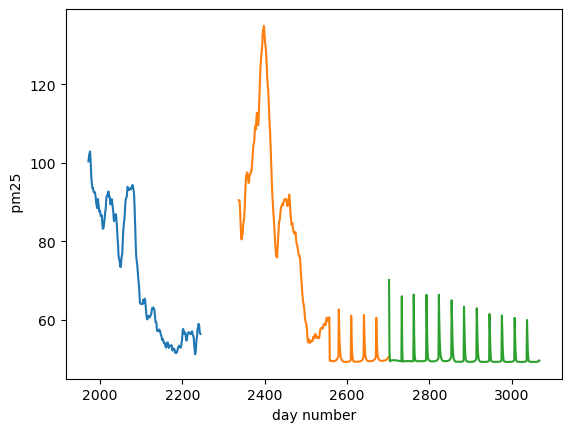

In [146]:
fig, ax = plt.subplots()
#ax.plot(df_all.loc[df_all['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())

ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

Text(0, 0.5, ' pm25')

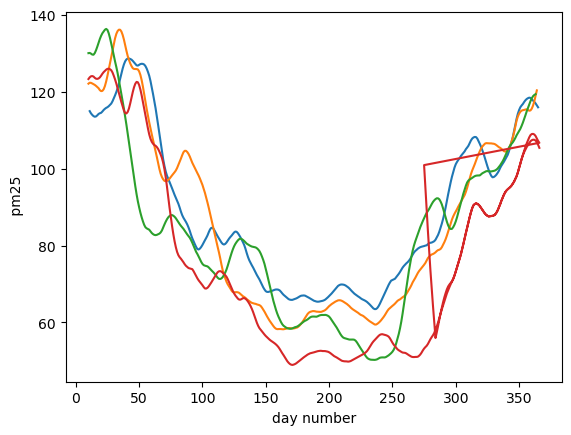

In [147]:
fig, ax = plt.subplots()
ax.plot(df_all.loc[df_all['year']==2017]['y_day'],df_all.loc[df_all['year']==2017][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2018]['y_day'],df_all.loc[df_all['year']==2018][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2019]['y_day'],df_all.loc[df_all['year']==2019][' pm25'].rolling(10).mean())
ax.plot(df_all.loc[df_all['year']==2020]['y_day'],df_all.loc[df_all['year']==2020][' pm25'].rolling(10).mean())

ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

DataError: No numeric types to aggregate

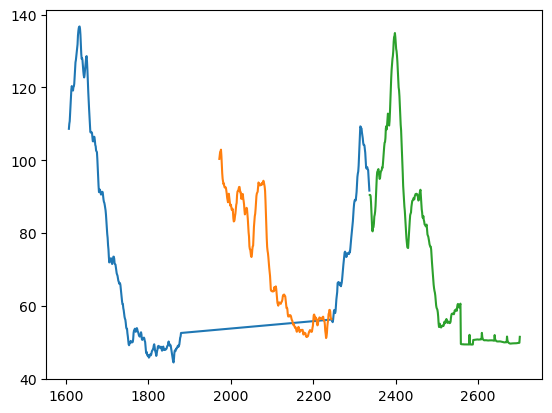

In [140]:
fig, ax = plt.subplots()
ax.plot(df_all.loc[df_all['year']==2021][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())



ax.set_xlabel('day number')
ax.set_ylabel(' pm25')

In [148]:
df_all[' pm25']

0            68.0
1            68.0
2            68.0
3           69.75
4            72.8
          ...    
3063    49.298702
3064    49.331875
3065    49.380051
3066     49.50333
3067    49.601685
Name:  pm25, Length: 3068, dtype: object

In [142]:
df_date[' pm25'] = ave_result
df_date

,date,pm25
0,11/08/2023,49.551792
1,12/08/2023,49.504665
2,13/08/2023,49.474388
3,14/08/2023,49.460541
4,15/08/2023,49.454460
...,...,...
504,27/12/2024,51.867252
505,28/12/2024,51.892666
506,29/12/2024,51.919025
507,30/12/2024,51.946365


In [149]:
df_test = df_date.copy()
df_test

,date,pm25
0,11/08/2023,49.551792
1,12/08/2023,49.504665
2,13/08/2023,49.474388
3,14/08/2023,49.460541
4,15/08/2023,49.454460
...,...,...
504,27/12/2024,51.867252
505,28/12/2024,51.892666
506,29/12/2024,51.919025
507,30/12/2024,51.946365


In [150]:
create_fea(df_test)

In [151]:
df_test

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,11/08/2023,49.551792,73.333333,11,8,2023,223,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/08/2023,49.504665,73.683333,12,8,2023,224,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/08/2023,49.474388,74.011111,13,8,2023,225,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14/08/2023,49.460541,74.091667,14,8,2023,226,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/08/2023,49.454460,74.093333,15,8,2023,227,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,27/12/2024,51.867252,134.495238,27,12,2024,362,4,51.710163,51.873516,...,51.825326,0.037524,49.809272,0.042903,51.765406,0.494625,51.764665,0.506479,49.871480,0.376401
505,28/12/2024,51.892666,134.319048,28,12,2024,363,4,51.731037,51.899227,...,51.849458,0.038715,49.829510,0.034337,51.765288,0.494633,51.763504,0.506117,49.865644,0.375181
506,29/12/2024,51.919025,133.859524,29,12,2024,364,4,51.752247,51.925869,...,51.874377,0.040024,49.845579,0.018661,51.765151,0.494636,51.762301,0.505672,49.860578,0.374204
507,30/12/2024,51.946365,133.126190,30,12,2024,365,4,51.773907,51.953480,...,51.900150,0.041434,49.855709,0.006876,51.764995,0.494633,51.761054,0.505135,49.803113,0.183608


Text(0, 0.5, ' pm25')

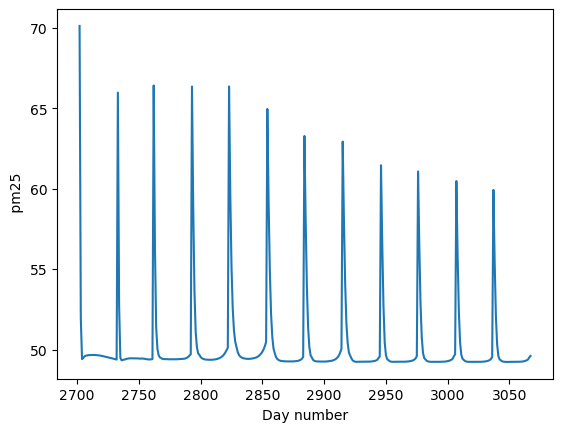

In [152]:
fig, ax = plt.subplots()
#ax.plot(df_all.loc[df_all['year']==2022][' pm25'].rolling(1).mean())
#ax.plot(df_all.loc[df_all['year']==2023][' pm25'].rolling(1).mean())
ax.plot(df_all.loc[df_all['year']==2024][' pm25'].rolling(1).mean())

ax.set_xlabel('Day number')
ax.set_ylabel(' pm25')

In [153]:
df_all

,date,pm25,PM2.5_ma20,day,month,year,y_day,y_quarter,lag_7,lag_30,...,Rmean_30_5,Rstd_30_5,Rmean_365_5,Rstd_365_5,Rmean_7_30,Rstd_7_30,Rmean_30_30,Rstd_30_30,Rmean_365_30,Rstd_365_30
0,30/7/2016,68.0,73.333333,30,7,2016,212,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/7/2016,68.0,73.683333,31,7,2016,213,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2016,68.0,74.011111,1,8,2016,214,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2016,69.75,74.091667,2,8,2016,215,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/8/2016,72.8,74.093333,3,8,2016,216,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,27/12/2024,49.298702,NaN,27,12,2024,362,4,51.731037,51.899227,...,51.849458,0.038715,49.829510,0.034337,51.765288,0.494633,51.763504,0.506117,49.865644,0.375181
3064,28/12/2024,49.331875,NaN,28,12,2024,363,4,51.752247,51.925869,...,51.874377,0.040024,49.845579,0.018661,51.765151,0.494636,51.762301,0.505672,49.860578,0.374204
3065,29/12/2024,49.380051,NaN,29,12,2024,364,4,51.773907,51.953480,...,51.900150,0.041434,49.855709,0.006876,51.764995,0.494633,51.761054,0.505135,49.803113,0.183608
3066,30/12/2024,49.50333,NaN,30,12,2024,365,4,51.796150,54.113300,...,52.353078,0.984445,50.188586,0.738329,51.764825,0.494620,51.759719,0.498604,49.834054,0.335016


In [154]:
df_all.to_csv("data_2024_new.csv", index=False)